## アヒル本の１２章（状態空間モデル）をやってみる

##### 参考サイト：https://qiita.com/shngt/items/d943269fd7413971cec4

In [2]:
# インポート
import numpy as np
import pandas as pd
import pystan
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
%matplotlib inline

In [3]:
# データ読み込み
ss1 = pd.read_csv('./data/data-ss1.txt')
ss1.head()

,X,Y
0,1,11.2
1,2,11.0
2,3,11.3
3,4,10.8
4,5,10.8


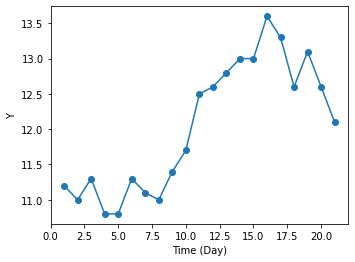

In [4]:
# 可視化
plt.figure(figsize=figaspect(3/4))
ax = plt.axes()
ax.plot('X', 'Y', 'o-', data=ss1)
plt.setp(ax, xlabel='Time (Day)', ylabel='Y')
plt.show()

In [5]:
# Stanで実装
T = ss1.index.size
data = dict(
    T=T,
    T_pred=3,
    Y=ss1['Y']
)
stanmodel = pystan.StanModel('./model/model12-2.stan')
fit = stanmodel.sampling(data=data, pars=('mu_all', 's_mu', 's_Y'), iter=4000, thin=5, seed=1234)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2c71685f06d54a480d95943c6916cdb3 NOW.


In [6]:
ms = fit.extract()

np.percentile(ms['s_mu'], (10, 50, 90))

array([0.2927935 , 0.38631916, 0.50629684])

In [7]:
np.percentile(ms['s_Y'], (10, 50, 90))

array([0.03763676, 0.1417533 , 0.26196546])

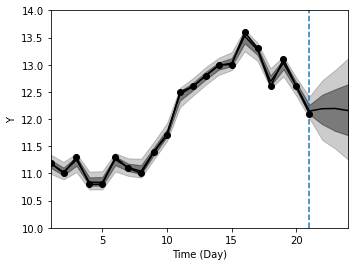

In [8]:
probs = (10, 25, 50, 75, 90)
d_est = pd.DataFrame(np.percentile(ms['mu_all'], (10, 25, 50, 75, 90), axis=0).T, columns=['p{}'.format(p) for p in probs])
d_est['x'] = d_est.index + 1

plt.figure(figsize=figaspect(3/4))
ax = plt.axes()

ax.plot('X', 'Y', 'o-', data=ss1, color='k')
ax.plot('x', 'p50', data=d_est, color='k')
ax.fill_between('x', 'p10', 'p90', data=d_est, color='k', alpha=0.2)
ax.fill_between('x', 'p25', 'p75', data=d_est, color='k', alpha=0.4)
ylim = (10, 14)
ax.vlines(T, ylim[0], ylim[1], linestyles='dashed')
plt.setp(ax, xlabel='Time (Day)', ylabel='Y', xlim=(1, 24), ylim=ylim)
plt.show()

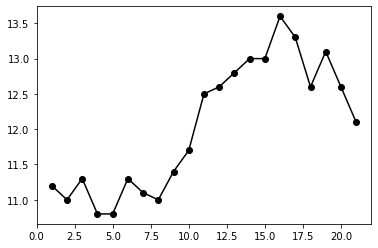

In [12]:
plt.plot('X', 'Y', 'o-', data=ss1, color='k')

In [13]:
ss1

,X,Y
0,1,11.2
1,2,11.0
2,3,11.3
3,4,10.8
4,5,10.8
5,6,11.3
6,7,11.1
7,8,11.0
8,9,11.4
9,10,11.7
